In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#loading dataset
df = pd.read_csv('/Users/alfahwun/Downloads/Market_Basket_Optimisation.csv',header=None)

<AxesSubplot: >

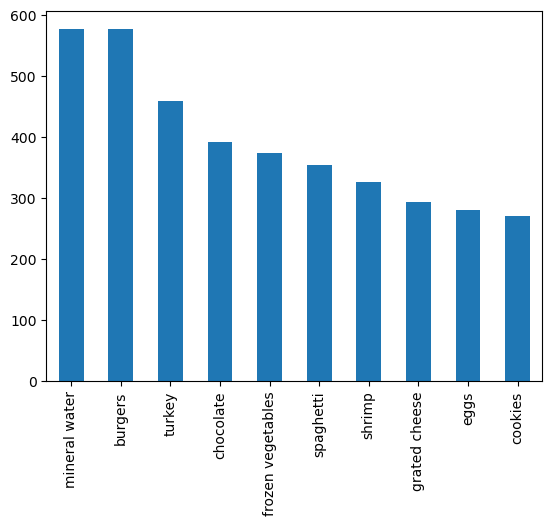

In [3]:
#10 best sellers
df[0].value_counts().head(10).plot.bar()

In [4]:
#creating a list from DataFrame
transactions = df.values.tolist()

In [5]:
#removing nan values inside the list
import itertools
for i, _ in itertools.product(range(len(transactions)), range(len(df.columns))):
    transactions[i] = [item for item in transactions[i] if str(item) != 'nan']

In [6]:
#Creating the transaction list
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [7]:
#One Hot encoding transactions
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)    #Apply one-hot-encoding on our dataset
df_transactions=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df_transactions

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Support
#Support: quantify how many times an item or an itemset appear in a set of transactions.
#In other words, support quantifies the frequency of an itemset.


from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_transactions, min_support=0.01,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(mineral water, ground beef, spaghetti)"
254,0.015731,"(mineral water, milk, spaghetti)"
255,0.010265,"(mineral water, olive oil, spaghetti)"


In [9]:
#Confidence
#Confidence: After buying an item X what’s the probability of buying item Y.

from mlxtend.frequent_patterns import association_rules
upsells  = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01) # associate items
upsells

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933
...,...,...,...,...,...,...,...,...,...
427,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198
428,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557
429,(mineral water),"(spaghetti, pancakes)",0.238368,0.025197,0.011465,0.048098,1.908923,0.005459,1.024059
430,(spaghetti),"(mineral water, pancakes)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385


In [10]:
#Lift
#Lift: What’s the probability to buy items X and Y together rather than just buying item X.

from mlxtend.frequent_patterns import association_rules
packs = association_rules(frequent_itemsets,metric="lift",min_threshold=1.1)
packs

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933
...,...,...,...,...,...,...,...,...,...
377,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198
378,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557
379,(mineral water),"(spaghetti, pancakes)",0.238368,0.025197,0.011465,0.048098,1.908923,0.005459,1.024059
380,(spaghetti),"(mineral water, pancakes)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385
